<a href="https://colab.research.google.com/github/Rohit-hub00/Business-Insights-Data-Analysis/blob/main/Tata_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/Online Retail.xlsx')

In [3]:
original_df = df.copy()

In [4]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [5]:
desc_map = df.groupby('StockCode')['Description'].agg(pd.Series.mode)

df['Description'] = df['Description'].fillna(df['StockCode'].map(desc_map))

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [8]:
df.duplicated().sum()

np.int64(5225)

In [9]:
df.drop_duplicates(inplace=True)

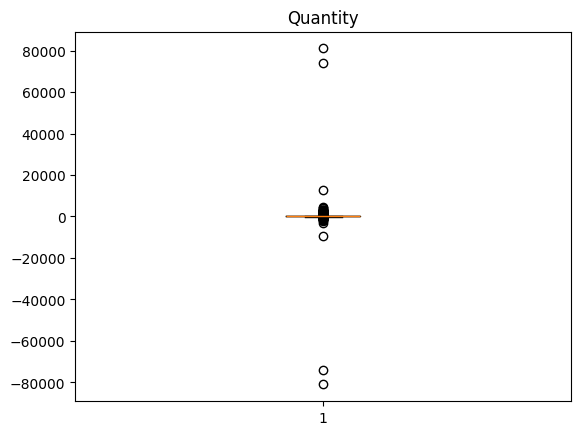

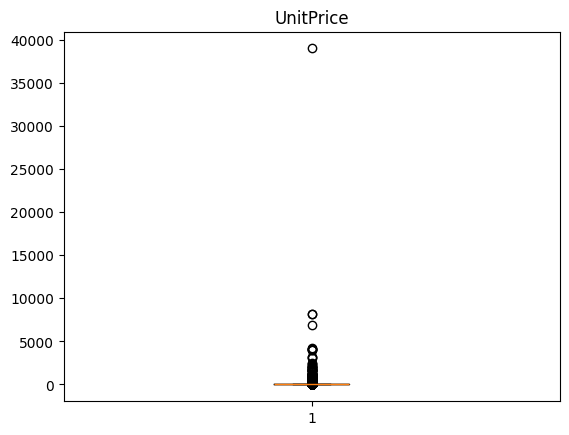

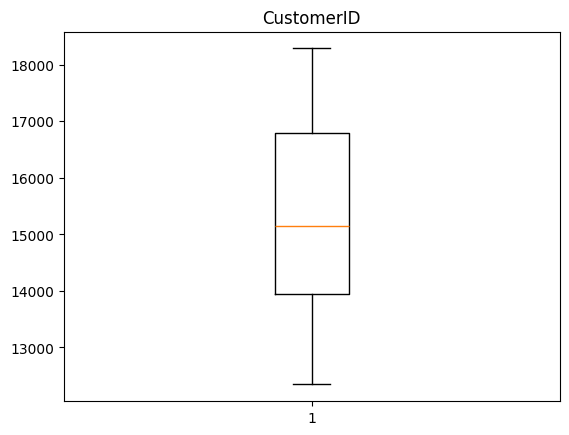

In [10]:
for col in df.columns:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    plt.boxplot(df[col].values)
    plt.title(col)
    plt.show()


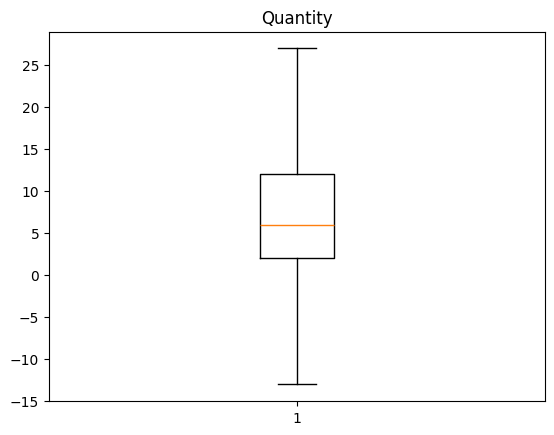

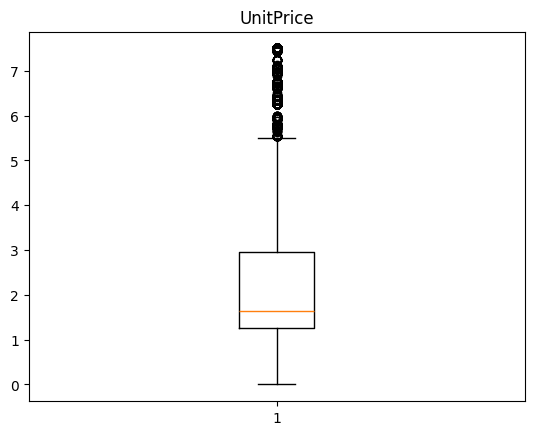

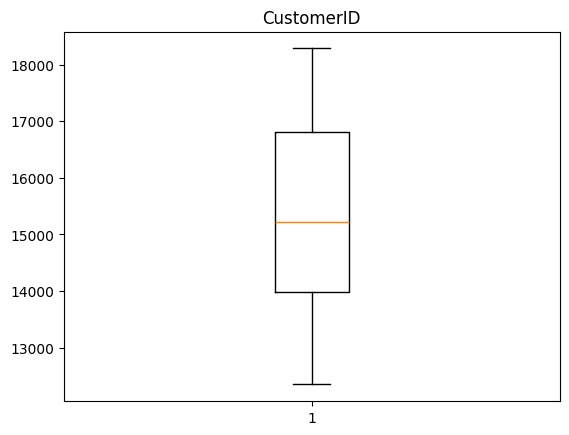

In [11]:
for col in df.columns:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR

    df = df[(df[col] >= LB) & (df[col] <= UB)]


for col in df.columns:
  if df[col].dtype == 'int64' or df[col].dtype == 'float64':
    plt.boxplot(df[col].values)
    plt.title(col)
    plt.show()

# **TASK ONE**

# **Questions of interest to the CEO**

**1. Which region is generating the highest revenue, and which region is generating the lowest?**

In [12]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [13]:
highest_revenue_Country = df.groupby('Country')['Revenue'].sum().idxmax()
highest_revenue_val = df.groupby('Country')['Revenue'].sum().max()
lowest_revenue_Country = df.groupby('Country')['Revenue'].sum().idxmin()
lowest_revenue_val = df.groupby('Country')['Revenue'].sum().min()

In [14]:
print(f'Highest Revenue: {highest_revenue_Country} (${round(highest_revenue_val,2)})')
print(f'Lowest Revenue: {lowest_revenue_Country} (${round(lowest_revenue_val,2)})')

Highest Revenue: United Kingdom ($3640261.51)
Lowest Revenue: Saudi Arabia ($131.17)


**2. What is the monthly trend of revenue, which months have faced the biggest increase/decrease?**

In [15]:
df['Invoice Month'] = df['InvoiceDate'].dt.month

In [50]:
Revenue_byMonth = df.groupby('Invoice Month')['Revenue'].sum().reset_index()

In [16]:
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

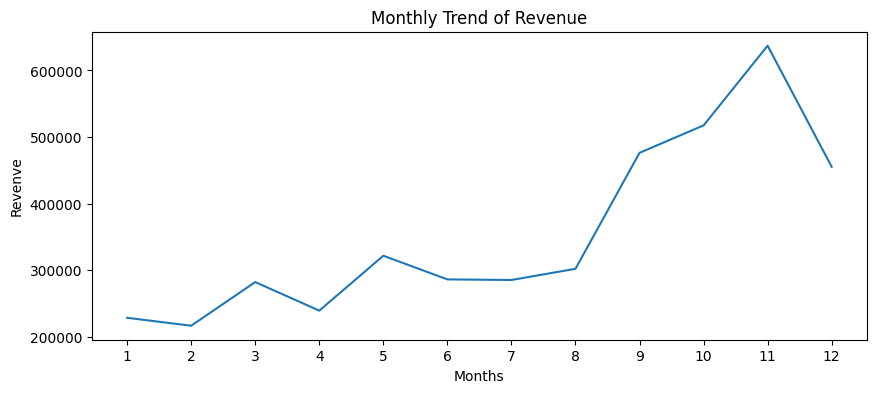

In [51]:
plt.figure(figsize=(10,4))

sns.lineplot(Revenue_byMonth,x='Invoice Month',y='Revenue')
plt.title('Monthly Trend of Revenue')
plt.xticks(range(1, 13))
plt.xlabel('Months')
plt.ylabel('Revenve')
plt.show()

**3. Which months generated the most revenue? Is there a seasonality in sales?**

In [18]:
highest_revenue_byMonth = df.groupby('Invoice Month')['Revenue'].sum().max()

In [19]:
month_number = df.groupby('Invoice Month')['Revenue'].sum().idxmax()
High_revenue_month = month_map[month_number]

print(f'{High_revenue_month} is the Highest Revenue of {highest_revenue_byMonth}')

November is the Highest Revenue of 637134.12


**4. Who are the top customers and how much do they contribute to the total revenue? Is the business dependent on these customers or is the customer base diversified?**

In [20]:
customer_data_byRevenue = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False)

In [21]:
top10_Customers = customer_data_byRevenue.head(10)

In [22]:
print(top10_Customers.reset_index())

   CustomerID   Revenue
0     14911.0  83220.23
1     14096.0  36018.24
2     13089.0  35989.88
3     17841.0  31887.25
4     14298.0  24387.53
5     12748.0  20363.04
6     14156.0  18229.71
7     13081.0  17814.19
8     15311.0  17288.36
9     14088.0  15700.62


The business is not dependent on a small group of customers.

The top 10 customers contribute approximately 300k dollars out of a total $4.45M, which is less than 7% of total revenue. This indicates that revenue is well distributed across a broad customer base, reducing the risk of over-reliance on a few customers.

The customer base is well diversified, with no heavy dependence on a small number of customers, supporting stable and sustainable business growth.

# **Questions of interest to the CMO**

**1. What is the percentage of customers who are repeating their orders? Are they ordering the same products or different?**

In [23]:
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()

repeat_customers = customer_orders[customer_orders > 1]
total_customers = customer_orders.count()
repeat_count = repeat_customers.count()

In [24]:
Percentage_of_repeating_customers = (repeat_count/total_customers) * 100
print(f'Repeating customers are {round(Percentage_of_repeating_customers,2)}%')

Repeating customers are 68.0%


In [25]:
repeat_cust_ids = repeat_customers.index
repeat_data = df[df['CustomerID'].isin(repeat_cust_ids)]

In [26]:
product_stats = repeat_data.groupby('CustomerID').agg(
    unique_products=('StockCode', 'nunique'),
    total_line_items=('StockCode', 'count')
).sort_values(by='total_line_items', ascending=False)

In [27]:
product_stats['variety_ratio'] = product_stats['unique_products'] / product_stats['total_line_items']

product_stats.head(5)

,unique_products,total_line_items,variety_ratio
CustomerID,,,
17841.0,1211,7327,0.165279
14911.0,1547,4635,0.333765
14096.0,910,4416,0.206069
12748.0,1598,4069,0.392725
14606.0,752,2496,0.301282


**High Variety Ratio (Close to 1.0):** These customers are explorers. They almost never buy the same StockCode twice. Their repeat business is driven by your catalog's variety.

**Low Variety Ratio (Close to 0):** These are habitual buyers. They return specifically to restock the same items (like consumables or favorites).

**Mean Variety Ratio:** If the mean is around 0.5, it suggests a healthy mix—customers are coming back for some favorites while also trying new items.

In [28]:
top_products = df.groupby(['StockCode', 'Description']).agg(
    Total_Quantity=('Quantity', 'sum'),
    Total_Revenue=('Revenue', 'sum'),
    Unique_Customers=('CustomerID', 'nunique')
)

In [29]:
print("Top 10 Most Sold Products (Overall):")
print(top_products.sort_values(by='Total_Quantity', ascending=False).head(10))

Top 10 Most Sold Products (Overall):
                                              Total_Quantity  Total_Revenue  \
StockCode Description                                                         
21212     PACK OF 72 RETROSPOT CAKE CASES              14971        8269.69   
84879     ASSORTED COLOUR BIRD ORNAMENT                13542       22885.98   
85099B    JUMBO BAG RED RETROSPOT                      12050       24696.90   
85123A    WHITE HANGING HEART T-LIGHT HOLDER           10678       31459.86   
20725     LUNCH BAG RED RETROSPOT                       9674       16028.90   
22961     JAM MAKING SET PRINTED                        8611       12676.75   
21977     PACK OF 60 PINK PAISLEY CAKE CASES            8493        4683.65   
84991     60 TEATIME FAIRY CAKE CASES                   8371        4607.07   
22178     VICTORIAN GLASS HANGING T-LIGHT               7509       10751.15   
21498     RED RETROSPOT WRAP                            7447        3125.74   

              

In [30]:
print("Top 10 Most Revenue Products (Overall):")
print(top_products.sort_values(by='Total_Revenue', ascending=False).head(10))

Top 10 Most Revenue Products (Overall):
                                              Total_Quantity  Total_Revenue  \
StockCode Description                                                         
47566     PARTY BUNTING                                 7020       34613.70   
85123A    WHITE HANGING HEART T-LIGHT HOLDER           10678       31459.86   
85099B    JUMBO BAG RED RETROSPOT                      12050       24696.90   
23298     SPOTTY BUNTING                                4726       23371.90   
84879     ASSORTED COLOUR BIRD ORNAMENT                13542       22885.98   
23355     HOT WATER BOTTLE KEEP CALM                    4401       20498.55   
22960     JAM MAKING SET WITH JARS                      4982       20132.75   
22720     SET OF 3 CAKE TINS PANTRY DESIGN              4151       20033.07   
22112     CHOCOLATE HOT WATER BOTTLE                    3924       18349.18   
79321     CHILLI LIGHTS                                 3620       18336.10   

           

In [31]:
print("Top 10 Products with Highest Customer Reach (Overall):")
print(top_products.sort_values(by='Unique_Customers', ascending=False).head(10))

Top 10 Products with Highest Customer Reach (Overall):
                                              Total_Quantity  Total_Revenue  \
StockCode Description                                                         
85123A    WHITE HANGING HEART T-LIGHT HOLDER           10678       31459.86   
47566     PARTY BUNTING                                 7020       34613.70   
22720     SET OF 3 CAKE TINS PANTRY DESIGN              4151       20033.07   
84879     ASSORTED COLOUR BIRD ORNAMENT                13542       22885.98   
21212     PACK OF 72 RETROSPOT CAKE CASES              14971        8269.69   
85099B    JUMBO BAG RED RETROSPOT                      12050       24696.90   
22457     NATURAL SLATE HEART CHALKBOARD                5895       17598.17   
22138     BAKING SET 9 PIECE RETROSPOT                  3304       15951.90   
22960     JAM MAKING SET WITH JARS                      4982       20132.75   
23298     SPOTTY BUNTING                                4726       23371.90 

**2. For the repeat customers, how long does it take for them to place the next order after being delivered the previous one?**

In [32]:
unique_orders = repeat_data[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()
unique_orders = unique_orders.sort_values(by=['CustomerID', 'InvoiceDate'])

unique_orders['Days_To_Return'] = unique_orders.groupby('CustomerID')['InvoiceDate'].diff().dt.days

return_days = unique_orders.dropna(subset=['Days_To_Return'])

In [33]:
return_days.head(5)

,CustomerID,InvoiceNo,InvoiceDate,Days_To_Return
72246,12347.0,542237,2011-01-26 14:30:00,49.0
148285,12347.0,549222,2011-04-07 10:43:00,70.0
220572,12347.0,556201,2011-06-09 13:01:00,63.0
286621,12347.0,562032,2011-08-02 08:48:00,53.0
428957,12347.0,573511,2011-10-31 12:25:00,90.0


In [34]:
print(f"Average Return Time: {return_days['Days_To_Return'].mean():.1f} days")
print(f"Median Return Time: {return_days['Days_To_Return'].median():.1f} days")

Average Return Time: 35.7 days
Median Return Time: 17.0 days


**3. What revenue is being generated from the customers who have ordered more than once?**

In [35]:
Revenue_from_repeated_cust = (repeat_data['Revenue'].sum()) / 1000000
print(f'Revenue generated from the repeated customers are ${round(Revenue_from_repeated_cust,2)}M.')

Revenue generated from the repeated customers are $3.95M.


**4. Who are the customers that have repeated the most? How much are they contributing to revenue?**

In [36]:
repeat_data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

,Revenue
CustomerID,
14911.0,83220.23
14096.0,36018.24
13089.0,35989.88
17841.0,31887.25
14298.0,24387.53
12748.0,20363.04
14156.0,18229.71
13081.0,17814.19
15311.0,17288.36


In [37]:
top_spenders = repeat_data.groupby('CustomerID').agg(
    order_frequency = ('InvoiceNo','nunique'),
    total_revenue = ('Revenue','sum')
).sort_values(by='order_frequency', ascending=False).reset_index()

In [38]:
print(f'***************\033[1m Top 10 Spenders \033[0m**************\n')
print(top_spenders.head(10))

*************** Top 10 Spenders **************

   CustomerID  order_frequency  total_revenue
0     14911.0              232       83220.23
1     12748.0              202       20363.04
2     17841.0              163       31887.25
3     14606.0              125        7993.63
4     15311.0              113       17288.36
5     13089.0               95       35989.88
6     12971.0               79        5354.43
7     13408.0               64        9169.14
8     14527.0               55        4318.47
9     17811.0               51        5441.36


# **TASK TWO**

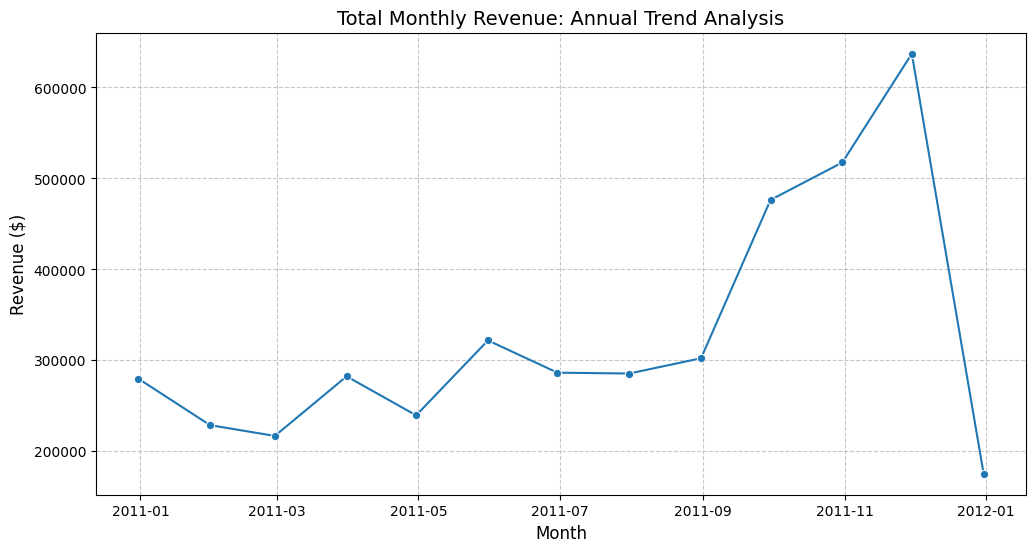

In [39]:
monthly_revenue = df.set_index('InvoiceDate')['Revenue'].resample('ME').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, marker='o', color='#1f77b4')

plt.title('Total Monthly Revenue: Annual Trend Analysis', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [40]:
top_10_countries = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
df_top_countries = df[df['Country'].isin(top_10_countries.index)]

In [41]:
top_products = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10).index
df_top_countries['Product_Group'] = df_top_countries['Description'].apply(lambda x: x if x in top_products else 'Other Products')

/tmp/ipython-input-3623075316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_countries['Product_Group'] = df_top_countries['Description'].apply(lambda x: x if x in top_products else 'Other Products')


In [42]:
pivot_df = df_top_countries.groupby(['Country', 'Product_Group'])['Revenue'].sum().unstack().fillna(0)

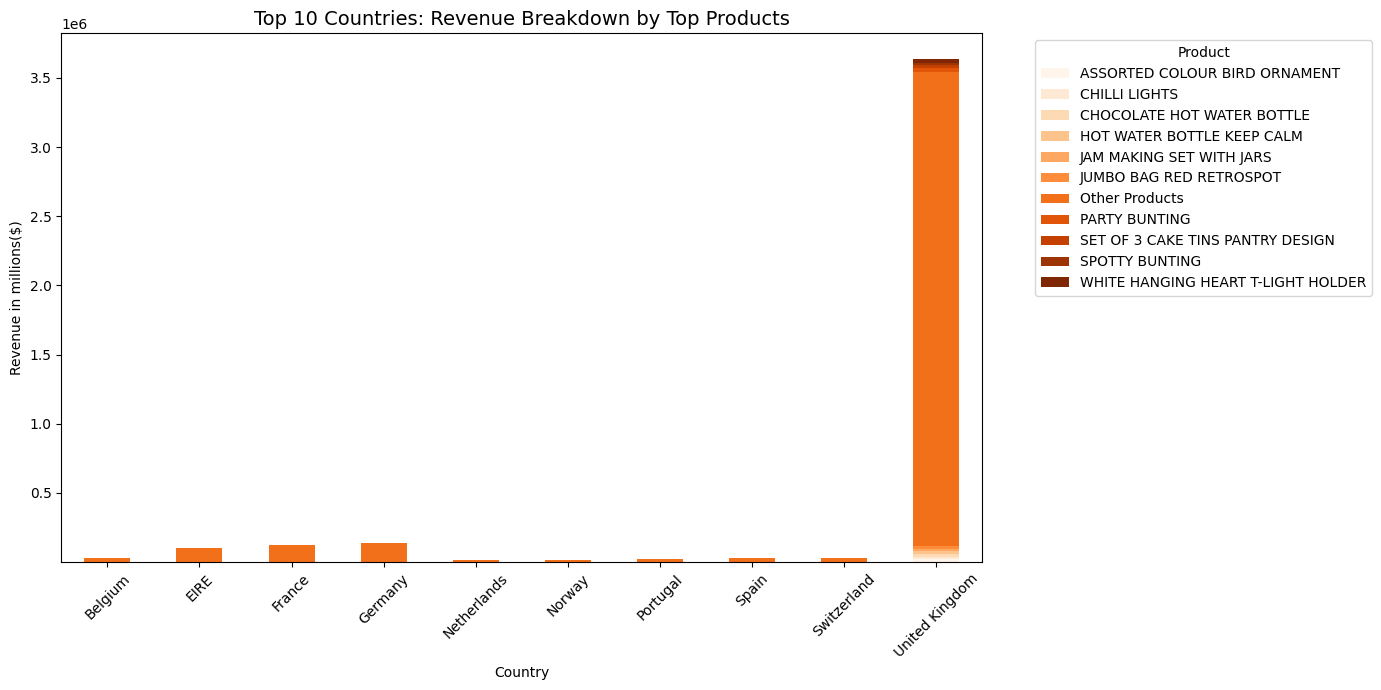

In [43]:
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Oranges')
plt.title('Top 10 Countries: Revenue Breakdown by Top Products', fontsize=14)
plt.ylabel('Revenue in millions($)')
plt.xticks(rotation=45)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

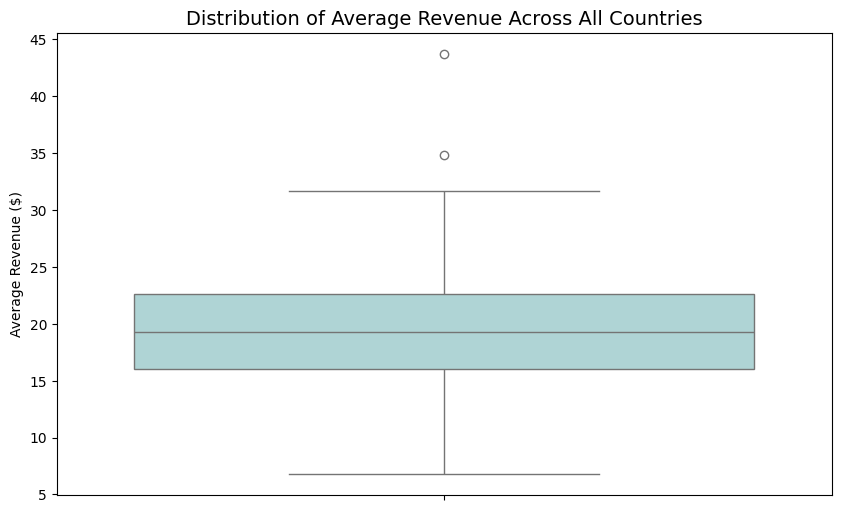

,Revenue
count,37.000000
mean,20.380018
std,7.051297
min,6.809331
25%,16.045234
50%,19.298232
75%,22.572727
max,43.684828


In [44]:
Avg_revenue_byCountry = df.groupby('Country')['Revenue'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(y=Avg_revenue_byCountry['Revenue'], color='#a8dadc')
plt.title('Distribution of Average Revenue Across All Countries', fontsize=14)
plt.ylabel('Average Revenue ($)')
plt.show()

Avg_revenue_byCountry['Revenue'].describe()